# Objectifs du jour: Prise en main de scikit-learn

- Aller sur la [page de la documentation](https://scikit-learn.org/) et regarder l'organisation de la page.
- Regarder la distinction entre régression (vers des cibles à valeur continu) et classification (vers des cibles à valeur discréte).
- Regarder l'API commune de tous les modèles (`fit`, `score`, `predict`).
- Reproduire l'entrainement déjà effectué en utilisant `LinearRegression` et un pipeline avec `PolynomialFeatures` comme première étape.
- Faire une crossvalidation via `cross_val_score` pour décider du meilleur modèle en fonction du dégré et de la zone de normalisation.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from typing import Callable

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

## Rapide prise en main de sklearn

Via une régression linéaire à une variable.

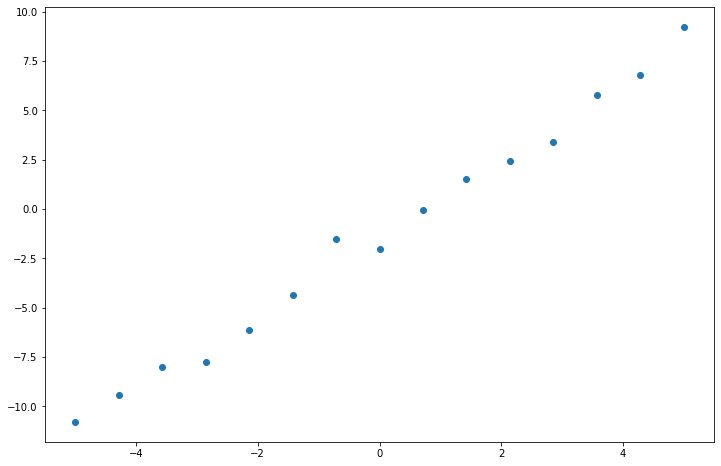

In [3]:
# Création de l'échantillon
x = np.linspace(-5, 5, 15) 
y = 2 * x - 1.5 + np.random.randn(15) *0.5
plt.scatter(x, y)

In [4]:
# Instanciation du modèle
modele = LinearRegression()

In [5]:
# Changement de forme de l'échantillon.
# Les modèles attendent toujours un tableau 2d en entrée, quitte à ce qu'il n'ait qu'une colonne.
# Noter l'utilisation d'une taille négative pour forcer numpy à faire le calcul lui-même    
X = x.reshape(-1, 1)
X

array([[-5.        ],
       [-4.28571429],
       [-3.57142857],
       [-2.85714286],
       [-2.14285714],
       [-1.42857143],
       [-0.71428571],
       [ 0.        ],
       [ 0.71428571],
       [ 1.42857143],
       [ 2.14285714],
       [ 2.85714286],
       [ 3.57142857],
       [ 4.28571429],
       [ 5.        ]])

In [6]:
# On a une alternative peut être plus lisible
x[:, np.newaxis]

array([[-5.        ],
       [-4.28571429],
       [-3.57142857],
       [-2.85714286],
       [-2.14285714],
       [-1.42857143],
       [-0.71428571],
       [ 0.        ],
       [ 0.71428571],
       [ 1.42857143],
       [ 2.14285714],
       [ 2.85714286],
       [ 3.57142857],
       [ 4.28571429],
       [ 5.        ]])

In [7]:
# Entrainement du modèle via la méthode fit de l'API générale
modele.fit(X, y)

LinearRegression()

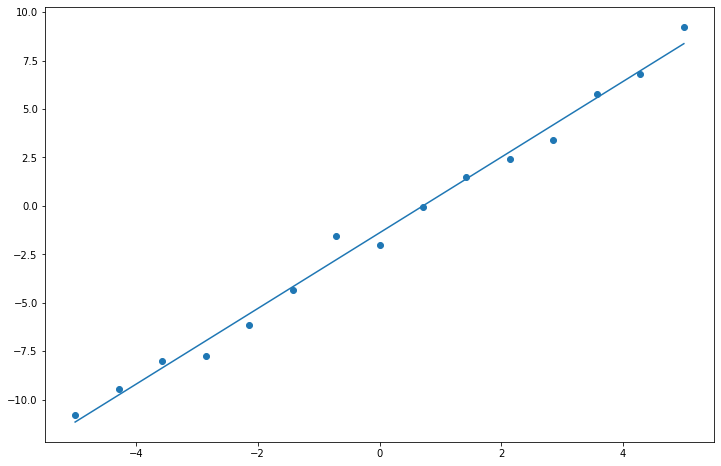

In [8]:
# Visualisation en utilisant la méthode predict de l'API générale
x_aff = np.linspace(-5, 5, 1000)
y_aff = modele.predict(x_aff.reshape(-1, 1))
plt.plot(x_aff, y_aff)
plt.scatter(x, y)

In [9]:
# Analyse numérique de la pertinence du modèle
print(
    "score sur la partie d'entrainement:", 
    modele.score(X, y)
)
print(
    "score sur une partie de test:",     
    modele.score(x_aff[:, np.newaxis], 2 * x_aff[:, np.newaxis] - 1.5)
)

score sur la partie d'entrainement: 0.9911992278162677
score sur une partie de test: 0.9991106989375026


**REMARQUE** le score ne doit pas être confondu avec l'erreur:  
- Un modèle parfait aura le score de 1 qui est maximal.
- Un modèle renvoyant la valeur moyenne systématiquement aura 0.
- Le score peut être arbitrairement négatif.

Voir la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.base.RegressorMixin.html?highlight=score#sklearn.base.RegressorMixin.score) pour la formule précise de calcul.

**REMARQUE** après entrainement les coefficients internes sont accessibles comme attributs du modèle (avec un underscore final).

In [10]:
modele.coef_

array([1.95293352])

In [11]:
modele.intercept_

-1.3941448551909617

## Apprentissage polynomial

### Génération de l'échantillon

In [12]:
gauche = -1.
droite = 2.
nb_points = 30

def cible(x):
    return np.exp(1 / (2 + np.cos(7 * x) * np.sin(20 * x)))

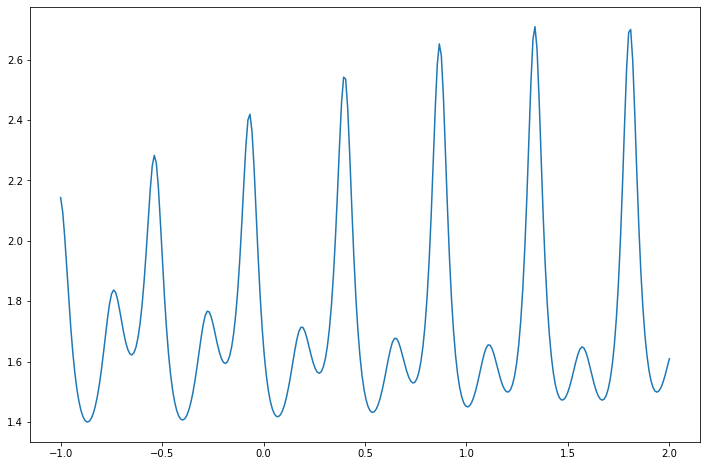

In [13]:
x_aff = np.linspace(gauche, droite, 300)
y_aff = cible(x_aff)
plt.plot(x_aff, y_aff)

In [14]:
x = np.random.uniform(low=gauche, high=droite, size=(nb_points, 1))
x

array([[ 1.12517343],
       [ 0.96311723],
       [ 0.56088274],
       [-0.71532543],
       [ 1.26955909],
       [ 1.59947739],
       [ 1.07343303],
       [ 1.59801165],
       [ 1.27756205],
       [ 0.84032287],
       [ 0.13622642],
       [ 0.48594157],
       [-0.64194565],
       [ 1.48509935],
       [-0.44194415],
       [-0.94565847],
       [-0.30935907],
       [-0.29432175],
       [ 1.94236477],
       [ 1.1771682 ],
       [ 0.37064292],
       [ 1.30313601],
       [ 1.908809  ],
       [-0.1527144 ],
       [ 1.59989648],
       [ 0.63182181],
       [ 0.40395118],
       [ 0.04384722],
       [ 0.40317591],
       [ 1.5842444 ]])

(30, 1) (30, 1)


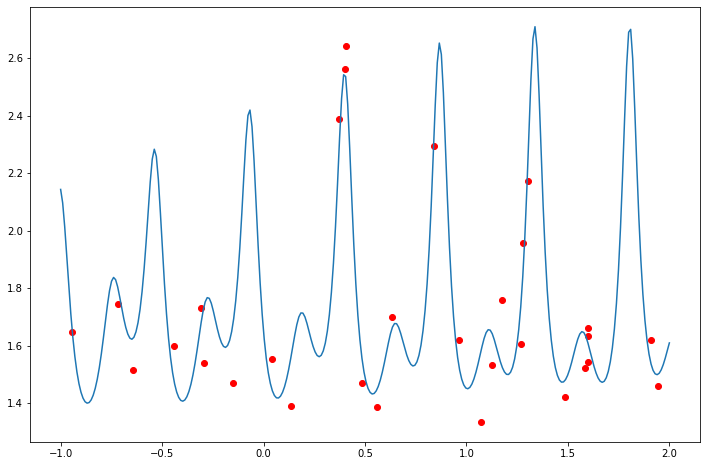

In [15]:
y = cible(x) + np.random.normal(size=x.shape) * 0.1
x_aff = np.linspace(gauche, droite, 300)
y_aff = cible(x_aff)
plt.plot(x_aff, y_aff)
print(x.shape, y.shape)
plt.scatter(x, y, color="red")

### Essai de régression linéaire à une variable

In [16]:
modele_bateau = LinearRegression()
modele_bateau.fit(x, y)

LinearRegression()

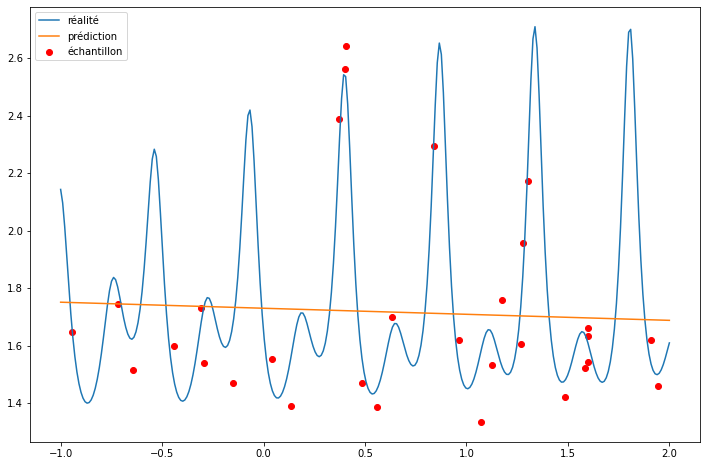

In [17]:
plt.plot(x_aff, y_aff, label="réalité")
plt.scatter(x, y, color="red", label="échantillon")
plt.plot(x_aff, modele_bateau.predict(x_aff[:, np.newaxis]), label="prédiction")
plt.legend()

In [18]:
modele_bateau.score(x, y)

0.002527701383028269

In [19]:
modele_bateau.score(x_aff.reshape(-1, 1), y_aff)

-0.015168262752162986

### Ajout d'une étape de preprocessing

L'apprentissage polynomial est en fait une régression linéaire sur un X possédant des "features" supplémentaires qui sont les puissances successives de x.

In [20]:
polynome = PolynomialFeatures(degree=2)

In [21]:
X = polynome.fit_transform(x)
X

array([[ 1.00000000e+00,  1.12517343e+00,  1.26601525e+00],
       [ 1.00000000e+00,  9.63117229e-01,  9.27594797e-01],
       [ 1.00000000e+00,  5.60882738e-01,  3.14589445e-01],
       [ 1.00000000e+00, -7.15325431e-01,  5.11690472e-01],
       [ 1.00000000e+00,  1.26955909e+00,  1.61178029e+00],
       [ 1.00000000e+00,  1.59947739e+00,  2.55832792e+00],
       [ 1.00000000e+00,  1.07343303e+00,  1.15225847e+00],
       [ 1.00000000e+00,  1.59801165e+00,  2.55364124e+00],
       [ 1.00000000e+00,  1.27756205e+00,  1.63216478e+00],
       [ 1.00000000e+00,  8.40322873e-01,  7.06142531e-01],
       [ 1.00000000e+00,  1.36226418e-01,  1.85576370e-02],
       [ 1.00000000e+00,  4.85941566e-01,  2.36139206e-01],
       [ 1.00000000e+00, -6.41945648e-01,  4.12094215e-01],
       [ 1.00000000e+00,  1.48509935e+00,  2.20552008e+00],
       [ 1.00000000e+00, -4.41944148e-01,  1.95314630e-01],
       [ 1.00000000e+00, -9.45658467e-01,  8.94269936e-01],
       [ 1.00000000e+00, -3.09359071e-01

In [22]:
# Comme on a la puissance 0 en première colonne on a plus besoin de la constante dans 
# la régression linéaire.
modele = LinearRegression(fit_intercept=False)
modele.fit(X, y)

LinearRegression(fit_intercept=False)

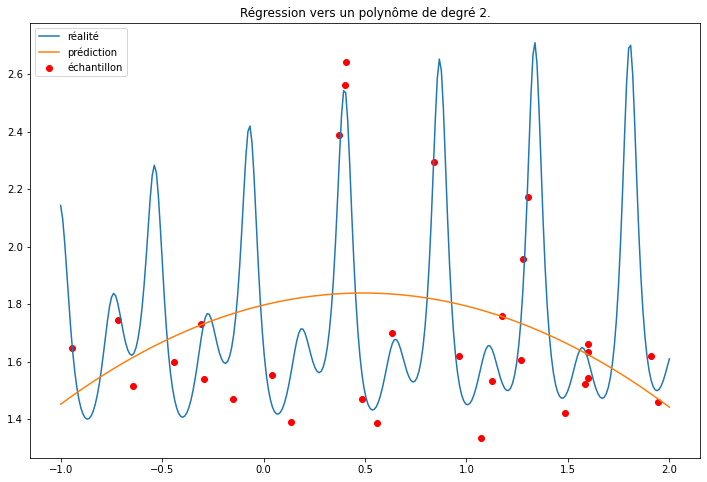

In [23]:
plt.title("Régression vers un polynôme de degré 2.")
plt.plot(x_aff, y_aff, label="réalité")
plt.scatter(x, y, color="red", label="échantillon")
plt.plot(x_aff, modele.predict(polynome.transform(x_aff[:, np.newaxis])), label="prédiction")
plt.legend()

In [24]:
modele.score(X, y)

0.10375979099894339

### Construction d'un pipeline équivalent pour automatiser plus facilement

In [25]:
tuyau = Pipeline(
    steps=[
        ("Generation puissances", PolynomialFeatures(degree=2)),
        ("Régression linéaire", LinearRegression(fit_intercept=False)),
    ]
)

In [26]:
tuyau.fit(x, y)

Pipeline(steps=[('Generation puissances', PolynomialFeatures()),
                ('Régression linéaire', LinearRegression(fit_intercept=False))])

In [27]:
tuyau.score(x, y)

0.10375979099894339

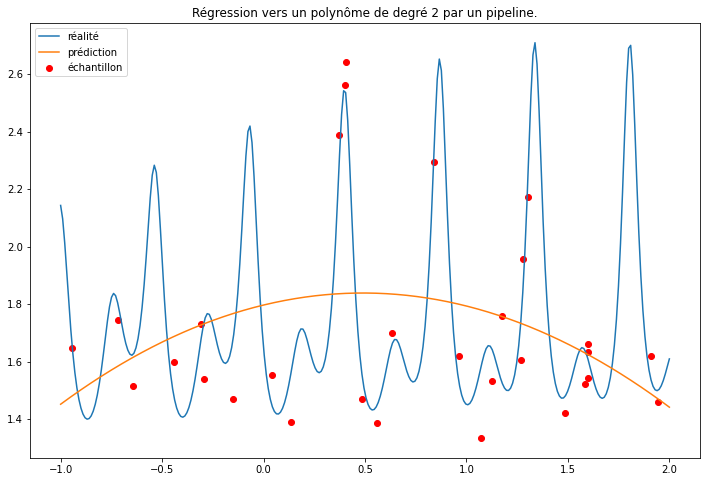

In [28]:
plt.title("Régression vers un polynôme de degré 2 par un pipeline.")
plt.plot(x_aff, y_aff, label="réalité")
plt.scatter(x, y, color="red", label="échantillon")
plt.plot(x_aff, modele.predict(polynome.transform(x_aff[:, np.newaxis])), label="prédiction")
plt.legend()

### Dépendance par rapport au degré

Avec un ajout d'une méthode de normalisation de l'entrée.

In [29]:
def genere_echantillon(
    gauche: float = -1., 
    droite: float = 2,
    nb_points: int =30,
    cible=Callable[[np.ndarray,], np.ndarray]
) -> tuple[np.ndarray, np.ndarray]:
    """Renvoie X, y."""
    x = (
        np.linspace(gauche, droite, nb_points)[:, np.newaxis] 
        + np.random.normal(size=(nb_points, 1)) * 0.02
    )
    y = cible(x) + np.random.normal(size=x.shape) * 0.05
    return x, y

In [30]:
def calcule_apprentissage(   
    degres: list[int], 
    cible: Callable[[np.ndarray,], np.ndarray]=cible, 
    nb_points: int = 30
) -> tuple[np.ndarray, np.ndarray]:
    """Renvoie les scores d'apprentissage et de test."""
    x, y = genere_echantillon(gauche=-1, droite=2., nb_points=nb_points, cible=cible)
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
    scores_test = list()
    scores_app = list()
    for degre in degres:
        tuyau = Pipeline(
            steps=[
                ("Normalisation", MinMaxScaler(feature_range=(-0.9, 0.9))),
                ("Generation puissances", PolynomialFeatures(degree=degre)),
                ("Régression linéaire", LinearRegression(fit_intercept=False)),
            ]
        )
        tuyau.fit(x_train, y_train)
        scores_app.append(tuyau.score(x_train, y_train))
        scores_test.append(tuyau.score(x_test, y_test))
    return scores_app, scores_test

In [31]:
def courbe_apprentissage(
    degres: list[int], 
    cible: Callable[[np.ndarray,], np.ndarray]=cible, 
    nb_points: int = 30
):
    """Affiche la courbe d'apprentissage correspondant à la variation des degres."""
    scores_train, scores_test = calcule_apprentissage(degres=degres, cible=cible, nb_points=nb_points)    
    fig, rep = plt.subplots(figsize=(12, 8))
    rep.plot(degres, scores_train, label="score apprentissage")
    rep.plot(degres, scores_test, label="score test")
    rep.set_ylim(-1.1, 1.1)
    rep.legend()
        
    

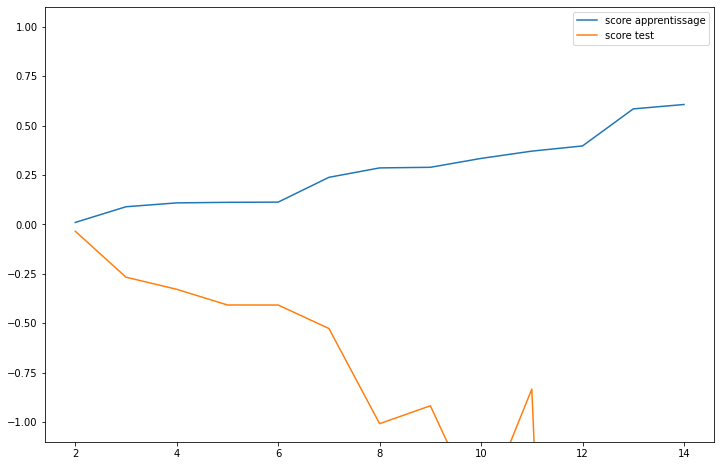

In [32]:
courbe_apprentissage(degres=[d for d in range(2, 15)])

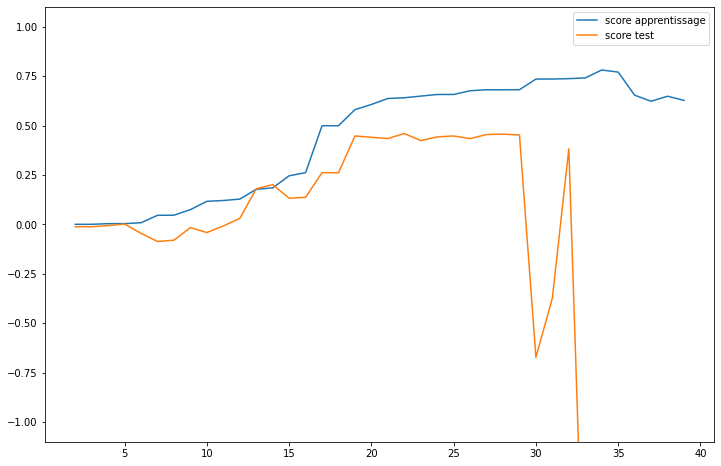

In [33]:
courbe_apprentissage(degres=[d for d in range(2, 40)], nb_points=100)

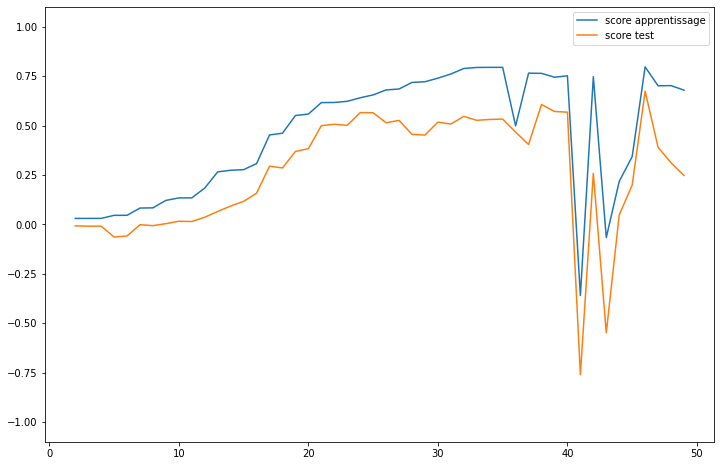

In [34]:
courbe_apprentissage(degres=[d for d in range(2, 50)], nb_points=200)

### Utilisation de la cross validation

In [35]:
def selection_meilleur(
    X_train: np.ndarray, 
    y_train: np.ndarray, 
    degres: list[int], 
    normalisations: list[float],
) -> tuple[int, float]:
    scores = dict()
    for degre in degres:
        for normalisation in normalisations:
            tuyau = Pipeline(
                steps=[
                    ("Normalisation", MinMaxScaler(feature_range=(-normalisation, normalisation))),
                    ("Generation puissances", PolynomialFeatures(degree=degre)),
                    ("Régression linéaire", LinearRegression(fit_intercept=False)),
                ]
            )
            scores[(degre, normalisation)] = cross_val_score(estimator=tuyau, X=X_train, y=y_train).mean()
    
    valeurs = iter(scores.items())
    meilleur_choix, meilleur_valeur = next(valeurs)
    for choix, valeur in valeurs:
        if valeur > meilleur_valeur:
            meilleur_choix = choix
    
    degre, normalisation = meilleur_choix
    tuyau = Pipeline(
        steps=[
            ("Normalisation", MinMaxScaler(feature_range=(-normalisation, normalisation))),
            ("Generation_puissances", PolynomialFeatures(degree=degre)),
            ("Regression_lineaire", LinearRegression(fit_intercept=False)),
        ]
    )
    tuyau.fit(X_train, y_train)
    return tuyau
    
        

In [36]:
x, y = genere_echantillon(nb_points=100, cible=cible)
x_tr, x_te, y_tr, y_te = train_test_split(x, y)
meilleur = selection_meilleur(
    X_train=x_tr, 
    y_train=y_tr, 
    degres=[i for i in range(10, 70)], 
    normalisations=[0.5, 0.74, 0.98, 1.02, 1.26, 1.5]
)
meilleur

Pipeline(steps=[('Normalisation', MinMaxScaler(feature_range=(-0.74, 0.74))),
                ('Generation_puissances', PolynomialFeatures(degree=10)),
                ('Regression_lineaire', LinearRegression(fit_intercept=False))])

In [37]:
meilleur.score(x_tr, y_tr)

0.1572788924087014

In [38]:
meilleur.score(x_te, y_te)

0.14361372757420032

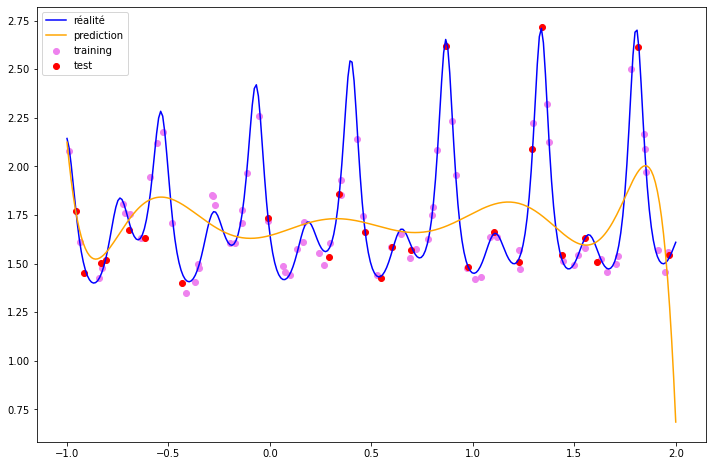

In [39]:
x_aff = np.linspace(-1., 2., 300)
y_aff = cible(x_aff)
plt.plot(x_aff, y_aff, label="réalité", color="blue")
plt.scatter(x_tr, y_tr, label="training", color="violet")
plt.scatter(x_te, y_te, label="test", color="red")
plt.plot(x_aff, meilleur.predict(x_aff[:, np.newaxis]), label="prediction", color="orange")
plt.legend()

**Conclusion** On note que 
- le score d'apprentissage est relativement faible le modèle n'est pas capable de s'adapter à l'échantillon
- malgré cela on a quand même un décalage entre les deux types d'erreurs signe d'un surapprentissage
- On aura donc tendance à vouloir augementer la taille de l'échantillon et à utiliser en plus des modèles plus sophistiqués.
- On voudra automatiser la tâche de recherche du meilleur modèle.